### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento

FATURAMENTO TOTAL POR LOJA

In [2]:
import pandas as pd

# Carregar os dados
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
]

lojas = [pd.read_csv(url) for url in urls]

# Converter 'Data da Compra' para datetime
for loja in lojas:
    loja["Data da Compra"] = pd.to_datetime(loja["Data da Compra"], format="%d/%m/%Y")

# Calcular o faturamento total por loja
faturamento_total = [loja["Preço"].sum() for loja in lojas]

# Exibir resultados
for i, fat in enumerate(faturamento_total):
    print(f"Faturamento total da loja {i+1}: R$ {fat:.2f}")


Faturamento total da loja 1: R$ 1534509.12
Faturamento total da loja 2: R$ 1488459.06
Faturamento total da loja 3: R$ 1464025.03
Faturamento total da loja 4: R$ 1384497.58


GRÁFICO COMPARATIVO DO FATURAMENTO TOTAL POR LOJA

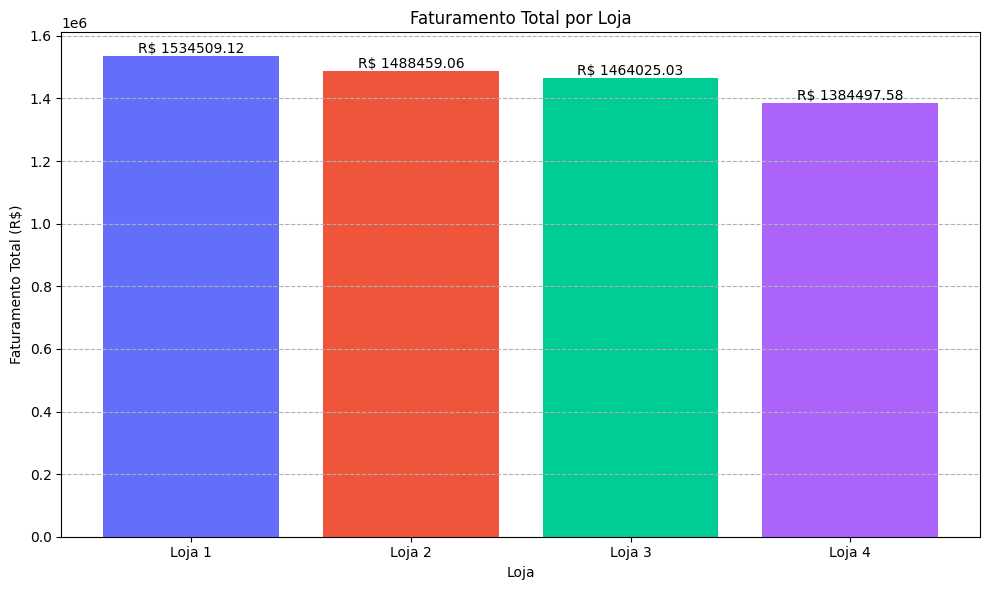

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
]

lojas = [pd.read_csv(url) for url in urls]

# Converter 'Data da Compra' para datetime
for loja in lojas:
    loja["Data da Compra"] = pd.to_datetime(loja["Data da Compra"], format="%d/%m/%Y")

# Calcular o faturamento total por loja
faturamento_total = [loja["Preço"].sum() for loja in lojas]
nomes_lojas = [f"Loja {i+1}" for i in range(len(lojas))]
# Definir cores para as lojas
cores_lojas = ['#636efa', '#EF553B', '#00cc96', '#ab63fa'] # Adicionei essa linha para definir as cores

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(nomes_lojas, faturamento_total, color=cores_lojas)
plt.xlabel("Loja")
plt.ylabel("Faturamento Total (R$)")
plt.title("Faturamento Total por Loja")
plt.xticks(nomes_lojas)
plt.grid(axis='y', linestyle='--')

# Adicionar os valores sobre as barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 500, f'R$ {yval:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

GRÁFICO COMPARATIVO DO FATURAMENTO MENSAL E ANUAL POR LOJA


In [4]:
!pip install plotly

In [5]:
import pandas as pd
import plotly.express as px

# Carregar os dados
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
]

lojas = [pd.read_csv(url) for url in urls]
nomes_lojas = [f"Loja {i+1}" for i in range(len(lojas))]

# Adicionar a coluna 'Loja' e converter datas
for i, loja in enumerate(lojas):
    loja['Loja'] = nomes_lojas[i]
    loja["Data da Compra"] = pd.to_datetime(loja["Data da Compra"], format="%d/%m/%Y")
    loja["Mes_Ano"] = loja["Data da Compra"].dt.to_period('M').astype(str)  # Convertendo para string para exibição correta

# 🔹 Agrupar os dados por Loja e Mês/Ano, somando o faturamento total
df_faturamento = pd.concat(lojas).groupby(["Loja", "Mes_Ano"])["Preço"].sum().reset_index()

# 🔹 Criar gráfico com Plotly
fig = px.line(
    df_faturamento,
    x="Mes_Ano",
    y="Preço",
    color="Loja",
    markers=True,
    title="Faturamento Mensal por Loja",
    labels={"Mes_Ano": "Mês e Ano", "Preço": "Faturamento (R$)"}
)

# 🔹 Atualizando hovertemplate com os dados corretos
fig.update_traces(hovertemplate="Loja: %{data.name}<br>Mês: %{x}<br>Faturamento: R$ %{y:.2f}<extra></extra>")

# 🔹 Ajustando layout
fig.update_layout(xaxis_tickangle=-45, height=700)

# 🔹 Exibir gráfico
fig.show()



# 2. Vendas por Categoria

In [6]:
!pip install plotly

GRÁFICO COMPARATIVO ENTRE AS 3 CATEGORIAS COM MAIOR E AS 3 COM MENOR FATURAMENTO POR LOJA AO LONGO DOS ANOS

In [7]:
import plotly.express as px

In [8]:
import pandas as pd
import plotly.graph_objects as go
import plotly.subplots as sp

# Carregar os dados
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
]

lojas = [pd.read_csv(url) for url in urls]
nomes_lojas = [f"Loja {i+1}" for i in range(len(lojas))]
anos = sorted(pd.concat([loja['Data da Compra'].str[-4:].astype(int) for loja in lojas]).unique())
num_linhas = 2
num_colunas = 2

# Adicionar a coluna 'Loja' a cada DataFrame
for i, loja in enumerate(lojas):
    loja['Loja'] = nomes_lojas[i]

# Criar subplots
fig = sp.make_subplots(rows=num_linhas, cols=num_colunas, subplot_titles=[f"Ano {ano}" for ano in anos],
                        shared_xaxes=True, shared_yaxes=False, vertical_spacing=0.1,
                        specs=[[{'secondary_y': True} for _ in range(num_colunas)] for _ in range(num_linhas)])

# Cores para cada loja
cores_lojas = ['#636efa', '#EF553B', '#00cc96', '#ab63fa']

for i, ano in enumerate(anos):
    row = (i // num_colunas) + 1
    col = (i % num_colunas) + 1

    # Filtrar dados para o ano atual
    df_ano_completo = pd.concat([loja[loja['Data da Compra'].str[-4:].astype(int) == ano] for loja in lojas])

    # Calcular o faturamento total por categoria para o ano atual
    df_faturamento_ano = df_ano_completo.groupby('Categoria do Produto')['Preço'].sum().sort_values(ascending=False)

    top_3_categorias = df_faturamento_ano.head(3).index.tolist()
    bottom_3_categorias = df_faturamento_ano.tail(3).index.tolist()

    # Criar a ordem desejada das categorias no eixo X
    ordered_categories = top_3_categorias + bottom_3_categorias
    fig.update_xaxes(categoryorder='array', categoryarray=ordered_categories, row=row, col=col)

    # Encontrar o valor máximo das categorias menores para ajustar o eixo Y secundário
    max_faturamento_menor_ano = df_faturamento_ano[bottom_3_categorias].max() if bottom_3_categorias else 1
    # Ajustar a escala do eixo Y secundário
    scale_up_factor = 0.8
    upper_range_menor = max_faturamento_menor_ano * scale_up_factor
    fig.update_yaxes(title_text="Faturamento (Menor)", side="right", showgrid=False,
                     range=[0, upper_range_menor], row=row, col=col, secondary_y=True)
    fig.update_yaxes(title_text="Faturamento (Maior)", side="left", showgrid=True, row=row, col=col, secondary_y=False)

    for j, nome_loja in enumerate(nomes_lojas):
        # Filtrar dados para a loja e o ano atual
        df_loja_ano = df_ano_completo[df_ano_completo['Loja'] == nome_loja].groupby('Categoria do Produto')['Preço'].sum().fillna(0).reset_index()

        # Adicionar barras para as 3 maiores categorias
        categorias_maiores_loja = df_loja_ano[df_loja_ano['Categoria do Produto'].isin(top_3_categorias)]
        if not categorias_maiores_loja.empty:
            fig.add_trace(go.Bar(x=categorias_maiores_loja['Categoria do Produto'],
                                 y=categorias_maiores_loja['Preço'],
                                 name=f"{nome_loja} (Maior)", marker_color=cores_lojas[j], showlegend=(i == 0),
                                 legendgroup=nome_loja,
                                 hovertemplate=f"Loja: {nome_loja}<br>Categoria: %{{x}}<br>Faturamento: R$ %{{y:.2f}}<extra></extra>"),
                          row=row, col=col, secondary_y=False)

        # Adicionar barras para as 3 menores categorias
        categorias_menores_loja = df_loja_ano[df_loja_ano['Categoria do Produto'].isin(bottom_3_categorias)]
        if not categorias_menores_loja.empty:
            fig.add_trace(go.Bar(x=categorias_menores_loja['Categoria do Produto'],
                                 y=categorias_menores_loja['Preço'],
                                 name=f"{nome_loja} (Menor)", marker_color=cores_lojas[j], showlegend=False,
                                 legendgroup=nome_loja,
                                 hovertemplate=f"Loja: {nome_loja}<br>Categoria: %{{x}}<br>Faturamento: R$ %{{y:.2f}}<extra></extra>"),
                          row=row, col=col, secondary_y=True)

# Atualizar o layout
fig.update_layout(title_text='Faturamento das 3 Maiores e 3 Menores Categorias por Loja ao Longo dos Anos',
                  barmode='group')

fig.show()



LEVANTAMENTO DO FATURAMENTO POR VENDEDOR, POR ANO - MES DE CADA LOJA

In [9]:
import pandas as pd

# Carregar os dados
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
]

lojas = [pd.read_csv(url) for url in urls]

# Converter 'Data da Compra' para datetime e criar coluna Ano-Mês
for i, loja in enumerate(lojas):
    loja["Data da Compra"] = pd.to_datetime(loja["Data da Compra"], format="%d/%m/%Y")
    loja["Ano-Mes"] = loja["Data da Compra"].dt.to_period("M")
    loja["Loja"] = f"Loja {i+1}"  # Adicionar a identificação da loja

# Criar lista para armazenar os resultados
top_vendedores_por_loja = []

for loja in lojas:
    # Agrupar por mês, vendedor e calcular os indicadores
    vendas_vendedores = loja.groupby(["Loja", "Ano-Mes", "Vendedor"]).agg(
        Faturamento=("Preço", "sum"),
        Produto_mais_vendido=("Produto", lambda x: x.mode()[0]),
        Avaliação_média=("Avaliação da compra", "mean")
    ).reset_index()

    # Selecionar os 3 vendedores que mais faturaram por mês
    top_vendedores = vendas_vendedores.sort_values(["Ano-Mes", "Faturamento"], ascending=[True, False]) \
                                      .groupby(["Loja", "Ano-Mes"]) \
                                      .head(3) \
                                      .reset_index(drop=True)

    # Guardar resultado
    top_vendedores_por_loja.append(top_vendedores)

# Concatenar todas as lojas e exibir resultado
resultado_final = pd.concat(top_vendedores_por_loja, ignore_index=True)

print(resultado_final)





       Loja  Ano-Mes          Vendedor  Faturamento  \
0    Loja 1  2020-01    Beatriz Moraes      7447.97   
1    Loja 1  2020-01    Lucas Oliveira      6434.49   
2    Loja 1  2020-01      Thiago Silva      4724.10   
3    Loja 1  2020-02     Larissa Alves      7605.33   
4    Loja 1  2020-02  Isabella Pereira      7550.27   
..      ...      ...               ...          ...   
463  Loja 4  2023-02        João Souza      3078.86   
464  Loja 4  2023-02     Juliana Costa      2767.99   
465  Loja 4  2023-03      Rafael Costa      5190.36   
466  Loja 4  2023-03     Bianca Santos      3043.46   
467  Loja 4  2023-03    Lucas Oliveira      3019.89   

            Produto_mais_vendido  Avaliação_média  
0                  Guarda roupas         3.000000  
1             Assistente virtual         3.285714  
2                      Bicicleta         4.111111  
3                      Geladeira         3.166667  
4             Assistente virtual         4.750000  
..                         

In [10]:
for i, loja in enumerate(lojas):
    loja["Ano-Mes"] = loja["Data da Compra"].dt.to_period("M")
    faturamento_mensal = loja.groupby("Ano-Mes")["Preço"].sum()
    print(f"\nFaturamento mensal da loja {i+1}:\n", faturamento_mensal)


Faturamento mensal da loja 1:
 Ano-Mes
2020-01    44112.70
2020-02    53405.54
2020-03    42083.02
2020-04    44888.34
2020-05    51443.80
2020-06    35062.24
2020-07    46780.66
2020-08    41501.80
2020-09    40324.79
2020-10    28179.04
2020-11    26492.66
2020-12    37636.92
2021-01    34071.89
2021-02    43490.29
2021-03    39131.38
2021-04    30182.93
2021-05    37069.48
2021-06    41080.84
2021-07    49170.72
2021-08    46494.11
2021-09    59428.15
2021-10    36714.49
2021-11    34895.53
2021-12    31100.10
2022-01    34977.73
2022-02    37066.49
2022-03    33822.37
2022-04    29845.00
2022-05    33463.87
2022-06    33313.04
2022-07    36334.79
2022-08    37061.35
2022-09    49481.04
2022-10    19576.04
2022-11    31541.95
2022-12    45602.57
2023-01    38573.59
2023-02    49637.18
2023-03    49470.69
Freq: M, Name: Preço, dtype: float64

Faturamento mensal da loja 2:
 Ano-Mes
2020-01    41505.53
2020-02    23184.97
2020-03    40687.92
2020-04    36862.31
2020-05    33949.42
202

In [11]:
# Calcular o faturamento total de cada vendedor por loja
faturamento_vendedor_por_loja = {}
for i, loja_df in enumerate(lojas):
    nome_loja = f"Loja {i+1}"
    faturamento_total_vendedor = loja_df.groupby('Vendedor')['Preço'].sum().sort_values(ascending=False)
    faturamento_vendedor_por_loja[nome_loja] = faturamento_total_vendedor

GRÁFICO COMPARATIVO DOS 3 VENDEDORES COM MAIOR FATURAMENTO POR LOJA EM CADA ANO

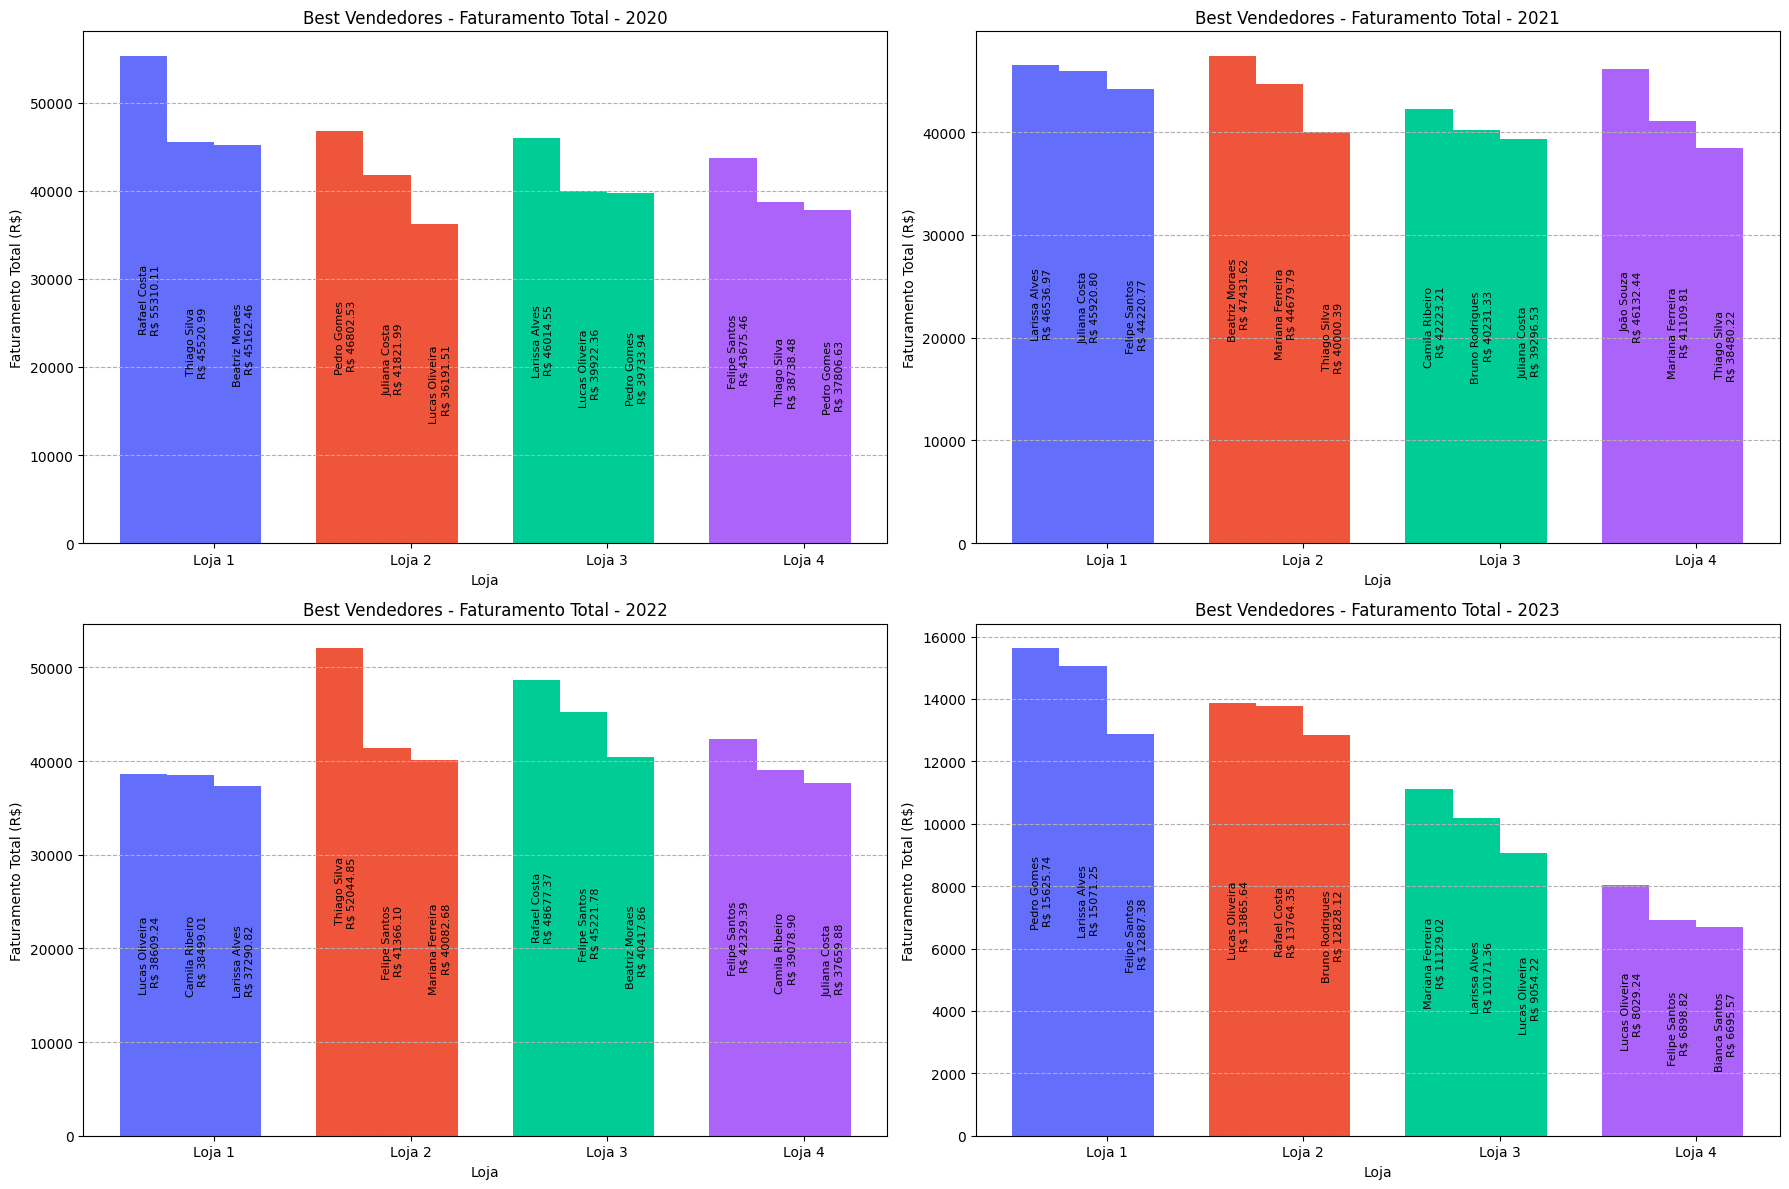

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Extrair os anos únicos dos dados (assumindo que todas as lojas têm os mesmos anos)
anos_unicos = sorted(lojas[0]['Data da Compra'].dt.year.unique())
num_anos = len(anos_unicos)

# Definir o layout dos subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()

for idx_ano, ano in enumerate(anos_unicos):
    ax = axes[idx_ano]
    ax.set_title(f"Best Vendedores - Faturamento Total - {ano}")
    ax.set_xlabel("Loja")
    ax.set_ylabel("Faturamento Total (R$)")
    ax.set_xticks(np.arange(len(nomes_lojas)))
    ax.set_xticklabels(nomes_lojas)
    ax.grid(axis='y', linestyle='--')

    x = np.arange(len(nomes_lojas))
    largura_base = 0.2  # Largura base para cada vendedor
    multiplicador_largura = 1.2
    largura = largura_base * multiplicador_largura

    cores_lojas = ['#636efa', '#EF553B', '#00cc96', '#ab63fa']  # Cores para cada loja

    for i, nome_loja in enumerate(nomes_lojas):
        if nome_loja in faturamento_vendedor_por_loja:
            vendedores_ano = {}
            for vendedor, faturamento_total in faturamento_vendedor_por_loja[nome_loja].items():
                loja_df = lojas[i]  # Seleciona o DataFrame correto da loja
                faturamento_ano = loja_df[(loja_df['Data da Compra'].dt.year == ano) & (loja_df['Vendedor'] == vendedor)]['Preço'].sum()
                if faturamento_ano > 0:
                    vendedores_ano[vendedor] = faturamento_ano

            vendedores_ordenados = sorted(vendedores_ano, key=vendedores_ano.get, reverse=True)[:3]
            num_vendedores_ano = len(vendedores_ordenados)
            offset_inicial = - (num_vendedores_ano * largura) / 2

            for j, vendedor in enumerate(vendedores_ordenados):
                faturamento = vendedores_ano[vendedor]
                posicao_x = x[i] + offset_inicial + j * largura
                bar = ax.bar(posicao_x, faturamento, largura, label=nome_loja if idx_ano == 0 and j == 0 else "", color=cores_lojas[i])
                ax.text(posicao_x + largura / 2.- 0.034, faturamento / 2.- 0.034, f'{vendedor}\nR$ {faturamento:.2f}',
                        ha='right', va='center', fontsize=8, color='black', rotation=90)

plt.tight_layout()
plt.show()

In [13]:
import pandas as pd

# Carregar os dados
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
]

lojas = [pd.read_csv(url) for url in urls]

# Converter 'Data da Compra' para datetime e criar coluna Ano-Mês
for i, loja in enumerate(lojas):
    loja["Data da Compra"] = pd.to_datetime(loja["Data da Compra"], format="%d/%m/%Y")
    loja["Ano-Mes"] = loja["Data da Compra"].dt.to_period("M")
    loja["Loja"] = f"Loja {i+1}"  # Adicionar a identificação da loja

# Criar lista para armazenar os resultados
top_vendedores_por_loja = []

for loja in lojas:
    # Agrupar por mês, vendedor e calcular os indicadores
    vendas_vendedores = loja.groupby(["Loja", "Ano-Mes", "Vendedor"]).agg(
        Faturamento=("Preço", "sum"),
        Produto_mais_vendido=("Produto", lambda x: x.mode()[0]),
        Avaliação_média=("Avaliação da compra", "mean")
    ).reset_index()

    # Selecionar os 3 vendedores que mais faturaram por mês
    top_vendedores = vendas_vendedores.sort_values(["Ano-Mes", "Faturamento"], ascending=[True, False]) \
                                        .groupby(["Loja", "Ano-Mes"]) \
                                        .head(3) \
                                        .reset_index(drop=True)

    # Guardar resultado
    top_vendedores_por_loja.append(top_vendedores)

# Concatenar todas as lojas e exibir resultado
resultado_final = pd.concat(top_vendedores_por_loja, ignore_index=True)

print(resultado_final)

       Loja  Ano-Mes          Vendedor  Faturamento  \
0    Loja 1  2020-01    Beatriz Moraes      7447.97   
1    Loja 1  2020-01    Lucas Oliveira      6434.49   
2    Loja 1  2020-01      Thiago Silva      4724.10   
3    Loja 1  2020-02     Larissa Alves      7605.33   
4    Loja 1  2020-02  Isabella Pereira      7550.27   
..      ...      ...               ...          ...   
463  Loja 4  2023-02        João Souza      3078.86   
464  Loja 4  2023-02     Juliana Costa      2767.99   
465  Loja 4  2023-03      Rafael Costa      5190.36   
466  Loja 4  2023-03     Bianca Santos      3043.46   
467  Loja 4  2023-03    Lucas Oliveira      3019.89   

            Produto_mais_vendido  Avaliação_média  
0                  Guarda roupas         3.000000  
1             Assistente virtual         3.285714  
2                      Bicicleta         4.111111  
3                      Geladeira         3.166667  
4             Assistente virtual         4.750000  
..                         

In [14]:
!pip install plotly

GRÁFICO COMPARATIVO DOS 3 VENDEDORES COM MAIOR FATURAMENTO POR LOJA EM CADA MES E ANO

In [15]:
import plotly.express as px

# Extrair os nomes das lojas únicos
nomes_lojas_unicas = resultado_final['Loja'].unique()

# Converter 'Ano-Mes' para string ANTES de plotar
resultado_final['Ano-Mes'] = resultado_final['Ano-Mes'].astype(str)

fig = px.line(resultado_final,
              x='Ano-Mes',
              y='Faturamento',
              color='Vendedor',
              facet_col='Loja',
              facet_col_wrap=2,
              markers=True,
              title='Top 3 Vendedores (Maior Faturamento Total) por Loja ao Longo do Tempo',
              labels={'Ano-Mes': 'Mês e Ano',
                      'Faturamento': 'Faturamento (R$)'},
              category_orders={'Loja': nomes_lojas_unicas},
              hover_data={'Ano-Mes': True, 'Faturamento': ':.2f', 'Vendedor': True})

fig.update_layout(
    title_x=0.5,
    height=800,  # Aumente este valor para aumentar a altura (valor em pixels)
    yaxis=dict(
        # Remova ou comente o tickvals para deixar a escala automática
        # tickvals=[0, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000]
        showgrid=True
    )
)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[1]))
fig.update_xaxes(tickangle=45)
fig.show()

In [16]:
import pandas as pd

# Carregar os dados
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
]

lojas = [pd.read_csv(url) for url in urls]

info_top_vendedores = {}
for i, loja in enumerate(lojas):
    top_3_vendedores = loja.groupby("Vendedor")["Preço"].sum().nlargest(3).index
    info_vendedores = []
    for vendedor in top_3_vendedores:
        vendas_vendedor = loja[loja["Vendedor"] == vendedor]
        produto_mais_vendido = vendas_vendedor["Produto"].mode().iloc[0] if not vendas_vendedor.empty else "N/A"
        avaliacao_media = vendas_vendedor["Avaliação da compra"].mean()
        faturamento_total = vendas_vendedor["Preço"].sum()
        info_vendedores.append({
            "Vendedor": vendedor,
            "Produto Mais Vendido": produto_mais_vendido,
            "Avaliação Média": faturamento_total if pd.isna(avaliacao_media) else f"{avaliacao_media:.2f}",
            "Faturamento Total (R$)": f"{faturamento_total:.2f}"
        })
    info_top_vendedores[nomes_lojas[i]] = pd.DataFrame(info_vendedores)

# Exibir o DataFrame com as informações
for loja, info_df in info_top_vendedores.items():
    print(f"\n--- Informações dos Top 3 Vendedores - {loja} ---")
    print(info_df)


--- Informações dos Top 3 Vendedores - Loja 1 ---
        Vendedor   Produto Mais Vendido Avaliação Média Faturamento Total (R$)
0  Larissa Alves                Bateria            3.88              135371.44
1   Rafael Costa            Lava louças            4.07              128361.90
2   Thiago Silva  Cadeira de escritório            3.75              125034.74

--- Informações dos Top 3 Vendedores - Loja 2 ---
        Vendedor Produto Mais Vendido Avaliação Média Faturamento Total (R$)
0   Thiago Silva            Cama king            4.00              122417.21
1    Pedro Gomes        TV Led UHD 4K            4.17              120187.54
2  Felipe Santos        Guarda roupas            4.11              117148.86

--- Informações dos Top 3 Vendedores - Loja 3 ---
         Vendedor Produto Mais Vendido Avaliação Média Faturamento Total (R$)
0   Larissa Alves        Kit banquetas            3.95              128437.43
1   Juliana Costa      Jogo de panelas            3.81             

In [17]:
from google.colab import data_table

TABELA COM OS 3 VENDEDORES COM MAIOR FATURAMENTO POR LOJA, COM QUAL PRODUTO, E A AVALIÇÃO MÉDIA DE COMPRA

In [18]:
from IPython.core.display import display, HTML

# Definir estilos CSS para melhorar a tabela
css_style = """
<style>
    .dataframe th, .dataframe td {
        text-align: center !important;  /* Centraliza os valores */
        white-space: nowrap;  /* Mantém o texto ajustado */
        padding: 5px;  /* Adiciona um pequeno espaçamento */
    }
    .titulo-loja {
        font-size: 20px;  /* Aumenta a fonte do título */
        font-weight: bold;
        margin-bottom: 20px;  /* Aumenta o espaço entre tabelas */
    }
    .grid-container {
        display: grid;
        grid-template-columns: repeat(2, 1fr); /* Cria um layout 2x2 */
        gap: 30px; /* Espaço entre as tabelas */
    }
    .grid-item {
        padding: 10px;
    }
</style>
"""

# Exibir o CSS
display(HTML(css_style))

# Criar estrutura de grid para as tabelas
html_content = '<div class="grid-container">'

for loja, info_df in info_top_vendedores.items():
    html_content += f'<div class="grid-item">'
    html_content += f'<div class="titulo-loja">Informações dos Top 3 Vendedores - {loja}</div>'
    html_content += info_df.to_html(index=False)  # Exibe a tabela sem filtros
    html_content += '</div>'

html_content += '</div>'

# Exibir as tabelas organizadas em grid
display(HTML(html_content))



Vendedor,Produto Mais Vendido,Avaliação Média,Faturamento Total (R$)
Larissa Alves,Bateria,3.88,135371.44
Rafael Costa,Lava louças,4.07,128361.90
Thiago Silva,Cadeira de escritório,3.75,125034.74
Vendedor,Produto Mais Vendido,Avaliação Média,Faturamento Total (R$)
Thiago Silva,Cama king,4.00,122417.21
Pedro Gomes,TV Led UHD 4K,4.17,120187.54
Felipe Santos,Guarda roupas,4.11,117148.86
Vendedor,Produto Mais Vendido,Avaliação Média,Faturamento Total (R$)
Larissa Alves,Kit banquetas,3.95,128437.43
Juliana Costa,Jogo de panelas,3.81,114760.67


In [19]:
import pandas as pd

pd.set_option("display.max_rows", None)  # Exibir todas as linhas
pd.set_option("display.max_columns", None)  # Exibir todas as colunas
pd.set_option("display.width", 1000)  # Aumentar a largura da tabela
pd.set_option("display.max_colwidth", None)  # Evitar cortes nas colunas


CORRELAÇÃO 3 MELHORES VENDEDORES POR LOJA, PRODUTO, FATURAMENTO E AVALIAÇÃO DE COMPRA

In [20]:
from IPython.display import display

display(resultado_final)


,Loja,Ano-Mes,Vendedor,Faturamento,Produto_mais_vendido,Avaliação_média
0,Loja 1,2020-01,Beatriz Moraes,7447.97,Guarda roupas,3.000000
1,Loja 1,2020-01,Lucas Oliveira,6434.49,Assistente virtual,3.285714
2,Loja 1,2020-01,Thiago Silva,4724.10,Bicicleta,4.111111
3,Loja 1,2020-02,Larissa Alves,7605.33,Geladeira,3.166667
4,Loja 1,2020-02,Isabella Pereira,7550.27,Assistente virtual,4.750000
5,Loja 1,2020-02,Felipe Santos,6328.30,Lava louças,3.285714
6,Loja 1,2020-03,Lucas Oliveira,8530.01,Bicicleta,2.777778
7,Loja 1,2020-03,Beatriz Moraes,5990.74,Lava louças,4.000000
8,Loja 1,2020-03,Pedro Gomes,5266.41,Tablet ABXY,4.000000
9,Loja 1,2020-04,Beatriz Moraes,12538.94,Mesa de centro,4.750000


In [21]:
resultado_final.to_csv("top_vendedores_resolvido.csv", index=False)


In [22]:
import pandas as pd

# Ativar Copy-on-Write para evitar o aviso SettingWithCopyWarning
pd.options.mode.copy_on_write = True


AS TRÊS CATEGORIAS MAIS E MENOS VENDIDAS POR LOJA

In [23]:
import pandas as pd

# Criando uma lista para armazenar os resultados por loja
categorias_por_loja = []

for i, loja in enumerate(lojas):
    # Agrupando por categoria e somando a quantidade de vendas
    vendas_por_categoria = loja.groupby("Categoria do Produto")["Preço"].sum().reset_index()

    # Ordenando para encontrar as categorias mais e menos vendidas
    vendas_por_categoria = vendas_por_categoria.sort_values(by="Preço", ascending=False)

    # Selecionando as 3 mais vendidas e as 3 menos vendidas
    top_3 = vendas_por_categoria.head(3)
    bottom_3 = vendas_por_categoria.tail(3)

    # Adicionando a coluna da loja correspondente
    top_3.loc[:, "Loja"] = f"Loja {i+1}"
    bottom_3.loc[:, "Loja"] = f"Loja {i+1}"


    # Armazenando os resultados
    categorias_por_loja.append(top_3)
    categorias_por_loja.append(bottom_3)

# Concatenando todas as lojas em um único DataFrame
resultado_categorias = pd.concat(categorias_por_loja, ignore_index=True)

# Exibir resultados
from IPython.display import display
display(resultado_categorias)


,Categoria do Produto,Preço,Loja
0,eletronicos,572659.23,Loja 1
1,eletrodomesticos,484913.36,Loja 1
2,moveis,250178.11,Loja 1
3,brinquedos,23993.78,Loja 1
4,utilidades domesticas,16931.48,Loja 1
5,livros,11713.92,Loja 1
6,eletronicos,547773.71,Loja 2
7,eletrodomesticos,464758.13,Loja 2
8,moveis,235234.68,Loja 2
9,brinquedos,21262.21,Loja 2


AS TRÊS CATEGORIAS MAIS E MENOS VENDIDAS POR TRIMESTRE DE CADA LOJA

In [24]:
# Criando uma lista para armazenar os resultados por loja
categorias_por_trimestre = []

for i, loja in enumerate(lojas):
    # Criar coluna com o trimestre do ano

    ###loja["Trimestre"] = loja["Data da Compra"].dt.to_period("Q")
    loja["Data da Compra"] = pd.to_datetime(loja["Data da Compra"], format="%d/%m/%Y")

    loja["Trimestre"] = loja["Data da Compra"].dt.to_period("Q")

    # Agrupar por trimestre e categoria do produto
    vendas_por_trimestre = loja.groupby(["Trimestre", "Categoria do Produto"])["Preço"].sum().reset_index()

    # Ordenar para identificar as categorias mais e menos vendidas por trimestre
    ###vendas_por_(by=["Trimestre", "Preço"], ascending=[True, False])trimestre = vendas_por_trimestre.sort_values
    vendas_por_trimestre = vendas_por_trimestre.sort_values(by=["Trimestre", "Preço"], ascending=[True, False]) # Corrected line

    # Selecionar as 3 mais vendidas e as 3 menos vendidas por trimestre
    top_3 = vendas_por_trimestre.groupby("Trimestre").head(3)
    bottom_3 = vendas_por_trimestre.groupby("Trimestre").tail(3)

    # Adicionar a informação da loja correspondente
    top_3.loc[:, "Loja"] = f"Loja {i+1}"
    bottom_3.loc[:, "Loja"] = f"Loja {i+1}"

    # Armazenando os resultados
    categorias_por_trimestre.append(top_3)
    categorias_por_trimestre.append(bottom_3)

# Concatenando todas as lojas em um único DataFrame
resultado_trimestres = pd.concat(categorias_por_trimestre, ignore_index=True)

# Exibir resultados
display(resultado_trimestres)


,Trimestre,Categoria do Produto,Preço,Loja
0,2020Q1,eletrodomesticos,56382.35,Loja 1
1,2020Q1,eletronicos,50074.25,Loja 1
2,2020Q1,moveis,14851.85,Loja 1
3,2020Q2,eletronicos,48232.52,Loja 1
4,2020Q2,eletrodomesticos,44327.48,Loja 1
5,2020Q2,moveis,19438.13,Loja 1
6,2020Q3,eletrodomesticos,54706.90,Loja 1
7,2020Q3,eletronicos,39616.67,Loja 1
8,2020Q3,moveis,16047.51,Loja 1
9,2020Q4,eletronicos,35047.66,Loja 1


# 3. Média de Avaliação das Lojas

In [25]:
import pandas as pd

# Criar uma lista para armazenar os resultados
avaliacao_por_loja = []

for i, loja in enumerate(lojas):
    # Calcular a média total da avaliação
    media_avaliacao = loja["Avaliação da compra"].mean()

    # Criar um DataFrame com os resultados
    df_avaliacao = pd.DataFrame({
        "Loja": [f"Loja {i+1}"],
        "Média Total da Avaliação": [round(media_avaliacao, 2)]
    })

    # Armazenar os resultados
    avaliacao_por_loja.append(df_avaliacao)

# Concatenar todas as lojas em um único DataFrame
resultado_avaliacao_total = pd.concat(avaliacao_por_loja, ignore_index=True)

# Exibir resultado
from IPython.display import display
display(resultado_avaliacao_total)


,Loja,Média Total da Avaliação
0,Loja 1,3.98
1,Loja 2,4.04
2,Loja 3,4.05
3,Loja 4,4.00


GRÁFICO COMPARATIVO DA MÉDIA DA AVALIAÇÃO DE COMPRA POR LOJA

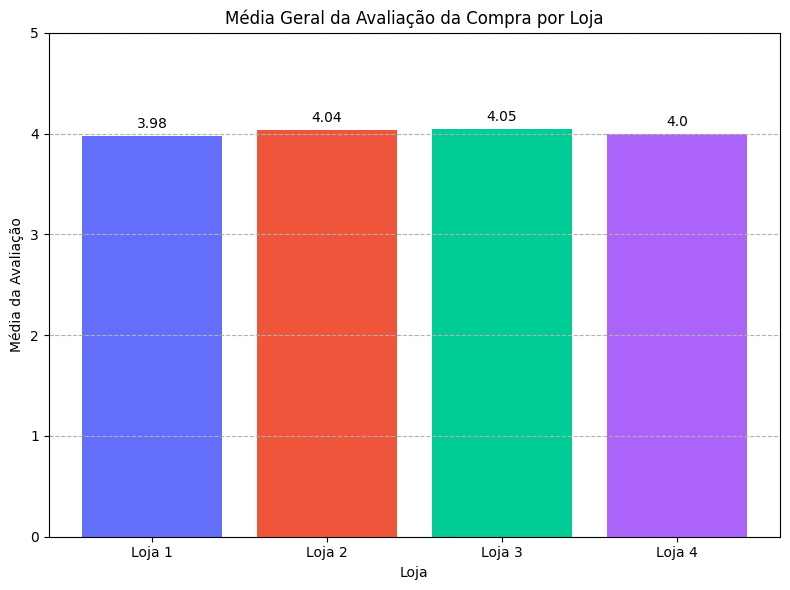

In [26]:
import matplotlib.pyplot as plt

# Dados do resultado_avaliacao_total
lojas = resultado_avaliacao_total['Loja']
medias_total = resultado_avaliacao_total['Média Total da Avaliação']

cores_lojas = ['#636efa', '#EF553B', '#00cc96', '#ab63fa']

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
bars = plt.bar(lojas, medias_total, color=cores_lojas)
plt.xlabel("Loja")
plt.ylabel("Média da Avaliação")
plt.title("Média Geral da Avaliação da Compra por Loja")
plt.ylim(0, 5)  # Assumindo que a avaliação vai de 1 a 5
plt.grid(axis='y', linestyle='--')

# Adicionar os valores sobre as barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

AVALIAÇÃO DE COMPRA MENSAL DE CADA LOJA

In [27]:
import pandas as pd

# URLs dos arquivos CSV
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
]

# Carregar os arquivos CSV em uma lista de DataFrames
lojas = [pd.read_csv(url) for url in urls]  # Lista de DataFrames

# Criar uma lista para armazenar os resultados
avaliacao_mensal_por_loja = []

# Processar cada loja
for i, loja in enumerate(lojas):
    # Converter "Data da Compra" para DateTime
    loja["Data da Compra"] = pd.to_datetime(loja["Data da Compra"], errors='coerce')

    # Criar a coluna de Ano-Mês
    loja["Ano-Mes"] = loja["Data da Compra"].dt.to_period("M")

    # Filtrar apenas os anos desejados
    loja_filtrada = loja[loja["Data da Compra"].dt.year.isin([2020, 2021, 2022, 2023])]

    # Calcular a média de avaliação por mês
    avaliacao_mensal = loja_filtrada.groupby("Ano-Mes")["Avaliação da compra"].mean().round(2).reset_index()

    # Adicionar a identificação da loja
    avaliacao_mensal["Loja"] = f"Loja {i+1}"

    # Armazenar os resultados
    avaliacao_mensal_por_loja.append(avaliacao_mensal)

# Concatenar todas as lojas em um único DataFrame
resultado_avaliacao_mensal = pd.concat(avaliacao_mensal_por_loja, ignore_index=True)

# Converter a coluna 'Ano-Mes' para string
resultado_avaliacao_mensal["Ano-Mes"] = resultado_avaliacao_mensal["Ano-Mes"].astype(str)

# Exibir resultado
display(resultado_avaliacao_mensal)


<ipython-input-27-dd0c643f0e33>:20: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

<ipython-input-27-dd0c643f0e33>:20: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



,Ano-Mes,Avaliação da compra,Loja
0,2020-01,3.83,Loja 1
1,2020-02,3.65,Loja 1
2,2020-03,3.89,Loja 1
3,2020-04,4.00,Loja 1
4,2020-05,3.76,Loja 1
5,2020-06,3.75,Loja 1
6,2020-07,4.21,Loja 1
7,2020-08,4.15,Loja 1
8,2020-09,3.98,Loja 1
9,2020-10,3.76,Loja 1


In [28]:
!pip install plotly

GRÁFICO COMPARATIVO DA MÉDIA DA AVALIAÇÃO DE COMPRA POR LOJA AO LONGO DO TEMPO

In [29]:
import plotly.express as px

cores_lojas = ['#636efa', '#EF553B', '#00cc96', '#ab63fa']

fig = px.line(resultado_avaliacao_mensal,
              x='Ano-Mes',
              y='Avaliação da compra',
              color='Loja',
              facet_col='Loja',
              facet_col_wrap=2,
              markers=True,
              title='Média de Avaliação da Compra por Loja ao Longo do Tempo',
              labels={'Ano-Mes': 'Ano-Mês',
                      'Avaliação da compra': 'Média da Avaliação'},
              hover_data={'Ano-Mes': True, 'Avaliação da compra': ':.2f', 'Loja': True})

fig.update_layout(title_x=0.5) # Centraliza o título
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[1])) # Remove "Loja=" dos títulos dos subplots
fig.update_xaxes(tickangle=45)
fig.update_yaxes(showgrid=True)
fig.show()

# 4. Produtos Mais e Menos Vendidos

In [30]:
import pandas as pd
from IPython.core.display import display, HTML

# URLs dos dados
urls = {
    "Loja 1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "Loja 2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "Loja 3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "Loja 4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
}

# Definir estilos CSS para melhorar a exibição
css_style = """
<style>
    .titulo-loja {
        font-size: 20px;
        font-weight: bold;
        margin-bottom: 15px;
    }
    .dataframe th, .dataframe td {
        text-align: center !important;
        padding: 8px;
    }
</style>
"""

# Exibir o CSS
display(HTML(css_style))

# Processar cada loja
for nome_loja, url in urls.items():
    # Carregar os dados
    loja_df = pd.read_csv(url)

    # Adicionar coluna identificando a loja
    loja_df["Loja"] = nome_loja

    # Contar a quantidade de vendas por produto e calcular faturamento total
    vendas_por_produto = loja_df.groupby("Produto")["Preço"].agg(["count", "sum"]).reset_index()
    vendas_por_produto.columns = ["Produto", "Quantidade Vendida", "Faturamento Total (R$)"]

    # Ordenar do mais vendido para o menos vendido
    vendas_por_produto = vendas_por_produto.sort_values(by="Quantidade Vendida", ascending=False)

    # Exibir os resultados organizados
    display(HTML(f'<div class="titulo-loja">Ranking de Vendas - {nome_loja}</div>'))
    display(vendas_por_produto)


,Produto,Quantidade Vendida,Faturamento Total (R$)
47,TV Led UHD 4K,60,189534.28
37,Micro-ondas,60,46348.89
24,Guarda roupas,60,39282.78
43,Secadora de roupas,58,78749.73
3,Blocos de montar,56,2487.74
17,Cômoda,56,20905.92
4,Bola de basquete,55,3666.88
2,Bicicleta,54,36592.38
14,Copo térmico,54,3284.68
23,Geladeira,54,149524.28


,Produto,Quantidade Vendida,Faturamento Total (R$)
28,Iniciando em programação,65,4169.96
37,Micro-ondas,62,48256.37
1,Bateria,61,61566.87
49,Violão,58,24864.13
40,Pandeiro,58,4967.00
43,Secadora de roupas,57,78820.31
12,Celular Plus X42,55,150967.83
24,Guarda roupas,54,34900.24
3,Blocos de montar,54,2385.91
30,Jogo de panelas,52,10619.48


,Produto,Quantidade Vendida,Faturamento Total (R$)
32,Kit banquetas,57,22265.96
36,Mesa de jantar,56,19101.40
9,Cama king,56,51779.90
17,Cômoda,55,20487.18
30,Jogo de panelas,55,11595.04
44,Smart TV,54,105116.46
21,Fogão,53,51430.37
39,Modelagem preditiva,53,4499.94
15,Corda de pular,53,1137.76
2,Bicicleta,52,32872.35


,Produto,Quantidade Vendida,Faturamento Total (R$)
8,Cama box,62,43928.57
20,Faqueiro,59,3532.16
9,Cama king,56,50073.16
18,Dashboards com Power BI,56,2654.28
17,Cômoda,55,20192.46
36,Mesa de jantar,55,17760.80
10,Carrinho controle remoto,55,5352.22
3,Blocos de montar,54,2546.40
44,Smart TV,54,110387.57
40,Pandeiro,52,4605.63


# 5. Frete Médio por Loja

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML, display

# Carregar os dados
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
]

lojas = [pd.read_csv(url) for url in urls]
nomes_lojas = [f"Loja {i+1}" for i in range(len(lojas))]
cores_lojas = ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon']

GRÁFICO COMPARATIVO DO VALOR MÉDIO DO FRETE POR LOJA

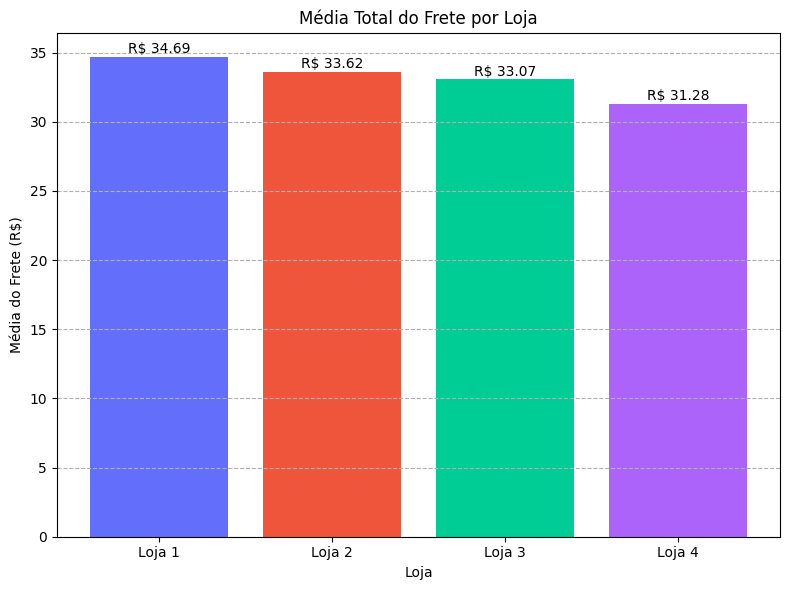

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Calcular a média total do frete por loja
media_frete_por_loja = pd.DataFrame([loja["Frete"].mean().round(2) for loja in lojas], index=nomes_lojas, columns=['Média Total do Frete'])

cores_lojas = ['#636efa', '#EF553B', '#00cc96', '#ab63fa']

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
bars = plt.bar(media_frete_por_loja.index, media_frete_por_loja['Média Total do Frete'], color=cores_lojas)
plt.xlabel("Loja")
plt.ylabel("Média do Frete (R$)")
plt.title("Média Total do Frete por Loja")

# Adicionar os valores sobre as barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, f'R$ {yval:.2f}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

In [33]:
!pip install plotly

GRÁFICO COMPARATIVO DA MÉDIA MENSAL DO FRETE CADA LOJA

In [34]:
import pandas as pd
import plotly.express as px

# Carregar os dados
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"
]

lojas = [pd.read_csv(url) for url in urls]
nomes_lojas = [f"Loja {i+1}" for i in range(len(lojas))]

# Adicionar a coluna 'Loja' e converter datas
for i, loja in enumerate(lojas):
    loja['Loja'] = nomes_lojas[i]
    loja["Data da Compra"] = pd.to_datetime(loja["Data da Compra"], format="%d/%m/%Y")
    loja["Ano-Mes"] = loja["Data da Compra"].dt.to_period("M").astype(str)  # Convertendo para string

# 🔹 Concatenar dados das lojas para criar um único DataFrame
df_frete_mensal = pd.concat([
    loja.groupby(["Ano-Mes", "Loja"])["Frete"].mean().reset_index() for loja in lojas
])

# 🔹 Criar gráfico com Plotly
fig = px.line(
    df_frete_mensal,
    x="Ano-Mes",
    y="Frete",
    color="Loja",
    markers=True,
    title="Média do Frete Mensal por Loja",
    labels={"Ano-Mes": "Mês e Ano", "Frete": "Média do Frete (R$)"}
)

# 🔹 Melhorando a interatividade do hover
#fig.update_traces(hovertemplate="<b>Loja:</b> %{text}<br><b>Mês:</b> %{x}<br><b>Média do Frete:</b> R$ %{y:.2f}", text=df_frete_mensal["Loja"])
fig.update_traces(hovertemplate="Loja: %{data.name}<br>Mês: %{x}<br>%{x}<br><b>Média do Frete:</b> R$ %{y:.2f}", text=df_frete_mensal["Loja"])

# 🔹 Ajustando layout
fig.update_layout(xaxis_tickangle=-45, height=700)

# 🔹 Exibir gráfico
fig.show()



CORRELAÇÃO DA MÉDIA DO FRETE COM A DISTÂNCIA DA ENTREGA - TRIMESTRAL

In [35]:
# Criar lista para armazenar os resultados
frete_por_trimestre = []

for i, loja in enumerate(lojas):
    # Criar coluna de trimestre
    # Criar coluna de trimestre
    loja["Trimestre"] = loja["Data da Compra"].dt.to_period("Q")
    # Converter a coluna 'Trimestre' para string
    loja["Trimestre"] = loja["Trimestre"].astype(str)

    # Calcular distância aproximada da entrega usando a latitude e longitude
    loja["Distancia"] = ((loja["lat"]**2 + loja["lon"]**2)**0.5).round(2)  # Simulação de cálculo de distância

    # Calcular média do frete por trimestre
    frete_trimestre = loja.groupby("Trimestre")[["Frete", "Distancia"]].mean().round(2).reset_index()

    # Adicionar informação da loja
    frete_trimestre["Loja"] = f"Loja {i+1}"

    # Armazenar resultado
    frete_por_trimestre.append(frete_trimestre)

# Concatenar todas as lojas
resultado_frete_trimestre = pd.concat(frete_por_trimestre, ignore_index=True)

# Exibir resultado
display(resultado_frete_trimestre)


,Trimestre,Frete,Distancia,Loja
0,2020Q1,36.46,51.30,Loja 1
1,2020Q2,42.20,52.12,Loja 1
2,2020Q3,38.07,51.60,Loja 1
3,2020Q4,30.45,52.37,Loja 1
4,2021Q1,34.19,51.71,Loja 1
5,2021Q2,33.90,51.22,Loja 1
6,2021Q3,39.23,51.82,Loja 1
7,2021Q4,30.60,51.20,Loja 1
8,2022Q1,32.38,51.67,Loja 1
9,2022Q2,28.31,52.67,Loja 1


In [36]:
!pip install plotly

GRÁFICO DA CORRELAÇÃO DA MÉDIA DO FRETE COM A DISTÂNCIA DA ENTREGA - TRIMESTRAL DE CADA LOJA

In [37]:
import plotly.express as px

fig = px.scatter(resultado_frete_trimestre,
                 x='Distancia',
                 y='Frete',
                 color='Loja',
                 hover_data=['Trimestre', 'Distancia', 'Frete', 'Loja'],
                 title='Correlação entre Frete Médio e Distância da Entrega por Trimestre',
                 labels={'Distancia': 'Distância Aproximada da Entrega',
                         'Frete': 'Média do Frete (R$)'})
fig.update_layout(xaxis_showgrid=True, yaxis_showgrid=True)
fig.show()

CORRELAÇÃO DOS 3 PRODUTOS MAIS E MENOS FATURADOS ENTRE O FRETE, E A % QUE O FRETE TEM SOBRE O FATURAMENTO. DIVISÃO POR TRIMESTRE DE CADA LOJA

In [38]:
import pandas as pd
from IPython.display import display

# Criar lista para armazenar os resultados
correlacao_frete_faturamento = []

for i, loja in enumerate(lojas):
    # Criar coluna de trimestre
    loja["Trimestre"] = loja["Data da Compra"].dt.to_period("Q")
    # Criar coluna de Ano
    loja["Ano"] = loja["Data da Compra"].dt.year

    # Calcular faturamento e frete médio por produto em cada trimestre
    faturamento_frete = loja.groupby(["Trimestre", "Ano", "Produto"]).agg(
        Faturamento=("Preço", "sum"),
        Frete_medio=("Frete", "mean")
    ).reset_index()

    faturamento_frete["Frete_medio"] = faturamento_frete["Frete_medio"].round(2)

    # Calcular porcentagem do frete sobre o faturamento
    faturamento_frete["% Frete/Faturamento"] = ((faturamento_frete["Frete_medio"] / faturamento_frete["Faturamento"]) * 100).round(2)

    # Identificar os 1 produto com maior faturamento e o 1 produto com menor faturamento por trimestre e ano
    top_1 = faturamento_frete.sort_values(["Trimestre", "Ano", "Faturamento"], ascending=[True, True, False]) \
                              .groupby(["Trimestre", "Ano"]) \
                              .head(1) \
                              .reset_index(drop=True)

    bottom_1 = faturamento_frete.sort_values(["Trimestre", "Ano", "Faturamento"], ascending=[True, True, True]) \
                                 .groupby(["Trimestre", "Ano"]) \
                                 .head(1) \
                                 .reset_index(drop=True)

    # Adicionar a informação da loja
    top_1["Loja"] = f"Loja {i+1}"
    bottom_1["Loja"] = f"Loja {i+1}"

    # Armazenar resultado
    correlacao_frete_faturamento.append(top_1)
    correlacao_frete_faturamento.append(bottom_1)

# Concatenar todas as lojas
resultado_correlacao_frete_faturamento = pd.concat(correlacao_frete_faturamento, ignore_index=True)

# Exibir resultado
display(resultado_correlacao_frete_faturamento)



,Trimestre,Ano,Produto,Faturamento,Frete_medio,% Frete/Faturamento,Loja
0,2020Q1,2020,Lava louças,17055.23,90.97,0.53,Loja 1
1,2020Q2,2020,Geladeira,20418.99,154.61,0.76,Loja 1
2,2020Q3,2020,Lava louças,20514.67,99.97,0.49,Loja 1
3,2020Q4,2020,Geladeira,10791.68,145.49,1.35,Loja 1
4,2021Q1,2021,TV Led UHD 4K,12343.17,165.45,1.34,Loja 1
5,2021Q2,2021,TV Led UHD 4K,18251.96,160.56,0.88,Loja 1
6,2021Q3,2021,TV Led UHD 4K,34074.15,165.07,0.48,Loja 1
7,2021Q4,2021,TV Led UHD 4K,14255.05,151.77,1.06,Loja 1
8,2022Q1,2022,Geladeira,13843.38,145.55,1.05,Loja 1
9,2022Q2,2022,TV Led UHD 4K,13347.56,176.04,1.32,Loja 1


In [39]:
!pip install plotly

CORRELAÇÃO ENTRE PRODUTO COM MAIOR E MENOR FATURAMENTO, E A PORCENTAGEM DO FRETE SOBRE 0 FATURAMENTO. POR LOJA E ANO



In [40]:
import pandas as pd
from IPython.display import display

# Criar lista para armazenar os resultados
correlacao_frete_faturamento = []

for i, loja in enumerate(lojas):
    # Criar coluna de Ano
    loja["Ano"] = loja["Data da Compra"].dt.year

    # Calcular faturamento por produto e ano
    faturamento_anual_produto = loja.groupby(["Ano", "Produto"]).agg(
        Faturamento=("Preço", "sum"),
        Frete_medio=("Frete", "mean")
    ).reset_index()

    faturamento_anual_produto["Frete_medio"] = faturamento_anual_produto["Frete_medio"].round(2)
    faturamento_anual_produto["% Frete/Faturamento"] = ((faturamento_anual_produto["Frete_medio"] / faturamento_anual_produto["Faturamento"]) * 100).round(2)

    for ano in sorted(loja['Ano'].unique()):
        dados_ano = faturamento_anual_produto[faturamento_anual_produto['Ano'] == ano]

        if not dados_ano.empty:
            # Encontrar o produto com maior faturamento no ano
            maior_faturamento = dados_ano.sort_values("Faturamento", ascending=False).iloc[0]
            maior_faturamento['Loja'] = f"Loja {i+1}"
            correlacao_frete_faturamento.append(maior_faturamento)

            # Encontrar o produto com menor faturamento no ano (excluindo faturamento zero se houver)
            menor_faturamento = dados_ano[dados_ano['Faturamento'] > 0].sort_values("Faturamento", ascending=True)
            if not menor_faturamento.empty:
                menor_faturamento = menor_faturamento.iloc[0]
                menor_faturamento['Loja'] = f"Loja {i+1}"
                correlacao_frete_faturamento.append(menor_faturamento)
            elif len(dados_ano) > 0: # Se só houver produtos com faturamento zero, pega o primeiro
                menor_faturamento = dados_ano.sort_values("Faturamento", ascending=True).iloc[0]
                menor_faturamento['Loja'] = f"Loja {i+1}"
                correlacao_frete_faturamento.append(menor_faturamento)


# Concatenar todas as lojas
resultado_correlacao_frete_faturamento = pd.DataFrame(correlacao_frete_faturamento)

# Exibir resultado
display(resultado_correlacao_frete_faturamento)

,Ano,Produto,Faturamento,Frete_medio,% Frete/Faturamento,Loja
23,2020,Geladeira,58983.40,149.82,0.25,Loja 1
16,2020,Cubo mágico 8x8,178.90,0.63,0.35,Loja 1
98,2021,TV Led UHD 4K,78924.33,161.53,0.20,Loja 1
66,2021,Corda de pular,131.99,0.76,0.58,Loja 1
125,2022,Geladeira,44319.09,147.30,0.33,Loja 1
121,2022,Dinossauro Rex,277.38,1.58,0.57,Loja 1
197,2023,TV Led UHD 4K,22120.51,169.32,0.77,Loja 1
171,2023,Dinossauro Rex,18.94,1.54,8.13,Loja 1
23,2020,Geladeira,42988.46,142.20,0.33,Loja 2
16,2020,Cubo mágico 8x8,248.57,1.50,0.60,Loja 2


GRÁFICO - CORRELAÇÃO ENTRE PRODUTO COM MAIOR E MENOR FATURAMENTO, E A PORCENTAGEM DO FRETE SOBRE 0 FATURAMENTO. POR LOJA E ANO

In [41]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Extrair os nomes das lojas únicos
nomes_lojas_unicas = resultado_correlacao_frete_faturamento['Loja'].unique()

# Criar a figura com subplots
fig = make_subplots(rows=2, cols=2, subplot_titles=[f"Loja {i+1}" for i in range(len(nomes_lojas_unicas))])

row_idx, col_idx = 1, 1
for i, nome_loja in enumerate(nomes_lojas_unicas):
    dados_loja = resultado_correlacao_frete_faturamento[resultado_correlacao_frete_faturamento['Loja'] == nome_loja]
    produtos = dados_loja['Produto'].unique()
    max_faturamento_loja = dados_loja['Faturamento'].max()
    y_max = max_faturamento_loja * 1.10  # Adicionando 10% de margem ao máximo

    for produto in produtos:
        dados_produto = dados_loja[dados_loja['Produto'] == produto]
        text_positions = ['top center'] * len(dados_produto)
        for idx, row in dados_produto.iterrows():
            if row['Faturamento'] > 0.8 * y_max:  # Se o ponto estiver nos 20% superiores
                text_positions[dados_produto.index.get_loc(idx)] = 'bottom center'

        fig.add_trace(go.Scatter(x=dados_produto['Ano'], y=dados_produto['Faturamento'],
                                 mode='markers+lines+text',
                                 name=produto,
                                 text=[f'{p:.2f}%' for p in dados_produto['% Frete/Faturamento']],
                                 textposition=text_positions,
                                 textfont=dict(color="black"),
                                 hovertemplate=f'Ano: %{{x}}<br>Faturamento: R$ %{{y:.2f}}<br>% Frete: %{{text}}<extra></extra>'),
                      row=row_idx, col=col_idx)

    ###fig.update_yaxes(title_text="Faturamento (R$)", range=[0, y_max], row=row_idx, col=col_idx)
    fig.update_yaxes(title_text="Faturamento (R$)", range=[-5000, y_max], row=row_idx, col=col_idx)

    fig.update_xaxes(
    title_text="Ano",
    tickvals=[2020, 2021, 2022, 2023],  # Define explicitamente quais valores aparecem no eixo
    ticktext=["2020", "2021", "2022", "2023"]  # Define os textos correspondentes
)


    if col_idx == 2:
        col_idx = 1
        row_idx += 1
    else:
        col_idx += 1

fig.update_layout(title_text="Faturamento e Porcentagem do Frete sobre o Faturamento dos Produtos de Maior e Menor Faturamento por Ano e Loja", showlegend=True)
fig.update_xaxes(title_text="Ano")
fig.show()

##RELATÓRIO DA ANÁLISE DOS DADOS DISPONÍVEIS

# Relatório de Análise Comparativa de Desempenho - Allure Store

Prezado(a) Sr. João,

Este relatório detalha a análise comparativa do desempenho das suas quatro lojas Allure Store, com o objetivo de fornecer uma recomendação baseada em dados sobre qual filial considerar para venda, visando o investimento em seu novo negócio. A análise foi conduzida utilizando as informações de vendas fornecidas, focando nas métricas solicitadas pelo Senhor.

As métricas analisadas incluem o **Faturamento Total**, as **Categorias Mais Populares**, a **Média de Avaliação dos Clientes**, os **Produtos Mais e Menos Vendidos**, e o **Custo Médio do Frete**.

---

## 1. Comparativo de Métricas Chave

A tabela a seguir apresenta uma comparação clara do desempenho das quatro lojas com base nos principais indicadores, formatada para melhor leitura:

<table style="border-collapse: collapse; width: 100%; border: 1px solid #dddddd;">
  <thead>
    <tr>
      <th style="border: 1px solid #dddddd; text-align: left; padding: 8px;">Métrica</th>
      <th style="border: 1px solid #dddddd; text-align: right; padding: 8px;">Loja 1</th>
      <th style="border: 1px solid #dddddd; text-align: right; padding: 8px;">Loja 2</th>
      <th style="border: 1px solid #dddddd; text-align: right; padding: 8px;">Loja 3</th>
      <th style="border: 1px solid #dddddd; text-align: right; padding: 8px;">Loja 4</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="border: 1px solid #dddddd; text-align: left; padding: 8px;">Faturamento Total</td>
      <td style="border: 1px solid #dddddd; text-align: right; padding: 8px;">R$ 1.534.509,12</td>
      <td style="border: 1px solid #dddddd; text-align: right; padding: 8px;">R$ 1.488.459,062</td>
      <td style="border: 1px solid #dddddd; text-align: right; padding: 8px;">R$ 1.464.025,03</td>
      <td style="border: 1px solid #dddddd; text-align: right; padding: 8px;">R$ 1.384.497,58</td>
    </tr>
    <tr>
      <td style="border: 1px solid #dddddd; text-align: right; padding: 8px;">Média Avaliação</td>
      <td style="border: 1px solid #dddddd; text-align: right; padding: 8px;">3,98</td>
      <td style="border: 1px solid #dddddd; text-align: right; padding: 8px;">4,04</td>
      <td style="border: 1px solid #dddddd; text-align: right; padding: 8px;">4,05</td>
      <td style="border: 1px solid #dddddd; text-align: right; padding: 8px;">4,00</td>
    </tr>
    <tr>
      <td style="border: 1px solid #dddddd; text-align: right; padding: 8px;">Custo Médio Frete</td>
      <td style="border: 1px solid #dddddd; text-align: right; padding: 8px;">R$ 34,69</td>
      <td style="border: 1px solid #dddddd; text-align: right; padding: 8px;">R$ 33,62</td>
      <td style="border: 1px solid #dddddd; text-align: right; padding: 8px;">R$ 33,07</td>
      <td style="border: 1px solid #dddddd; text-align: right; padding: 8px;">R$ 31,28</td>
    </tr>
  </tbody>
</table>  


#💰 Do faturamento total das lojas.

<table style="border-collapse: collapse; width: 100%;">
    <thead>
        <tr style="background-color: #555; color: white;">
            <th style="text-align: center; padding: 10px;">LOJA</th>
            <th style="text-align: center; padding: 10px;">FATURAMENTO</th>
            <th style="text-align: center; padding: 10px;">% EM RELAÇÃO AO FATURAMENTO MAIOR</th>
        </tr>
    </thead>
    <tbody>
        <tr style="background-color: #f0f0f0;">
            <td style="text-align: center; padding: 10px;">1</td>
            <td style="text-align: left; padding: 10px;">R$ 1.534.509,12</td>
            <td style="text-align: right; margin-right: 20px;">0%</td>
        </tr>
        <tr style="background-color: #d9d9d9;">
            <td style="text-align: center; padding: 10px;">2</td>
            <td style="text-align: left; padding: 10px;">R$ 1.488.459,06</td>
            <td style="text-align: center; padding: 10px;">-3,00%</td>
        </tr>
        <tr style="background-color: #f0f0f0;">
            <td style="text-align: center; padding: 10px;">3</td>
            <td style="text-align: left; padding: 10px;">R$ 1.464.025,03</td>
            <td style="text-align: center; padding: 10px;">-4,80%</td>
        </tr>
        <tr style="background-color: #d9d9d9;">
            <td style="text-align: center; padding: 10px;">4</td>
            <td style="text-align: left; padding: 10px;">R$ 1.384.497,58</td>
            <td style="text-align: center; padding: 10px;">-10,80%</td>
        </tr>
    </tbody>
</table>


##A VARIAÇÃO DO FATURAMENTO MENSAL POR LOJA

<table style="width: 100%;">
    <tr>        
        <td><img src="https://drive.google.com/uc?export=view&id=1e8VhjgHe8XErBkmsrUZoFDnuUXlmP5lO" width="100%" height="auto"></td>
        <td><img src="https://drive.google.com/uc?export=view&id=1z0wkAX9nDhv0NVoj1dXZ26oGPvgOruTU" width="100%" height="auto"></td>

<table style="width: 100%;">
    <tr>        
        <td><img src="https://drive.google.com/uc?export=view&id=1YfcJdjm7mRcolDD3njGc9f_j8xgA7G2S" width="100%" height="auto"></td>
        <td><img src="https://drive.google.com/uc?export=view&id=1qf2-_inuaQZNSuHTBBleRvx7IoQM6PsG" width="100%" height="auto"></td>
    </tr>
</table>  
  

Os Gráficos acima indicam uma grande ocilação no faturamento de todas as lojas em todos os meses. Nos dados fornecidos não foi possível encotrar nenhum indicador que justifique tais variações.
  



#💁 Vendedores - A Influência no Faturamento

NEsta tabela abaixo, ela nos apresenta os 3 vendedores com maior faturamento por loja. Sendo que o Faturamento dos 3 representa por volta de 10% do faturamento total da loja.

Mas, também nos apresenta uma dado que requer uma análise mais aprofundada. Os nomes de "Larissa Alves"; "Thiago Silva"; Felipe Santos"; aparecem em mais de uma loja, e em alguns casos no mesmo periodo de tempo.
###Se não forem nomes homônimos, esses dados podem ter uma grande influência no Faturamento total das lojas.

<table style="width: 100%;">
    <tr>        
        <td><img src="https://drive.google.com/uc?export=view&id=1EpXxX9E94PDj_EBJ3-9pRk55KV0v8tvh" width="100%" height="auto"></td>
</table>



---

## 2. Detalhes de Desempenho por Loja  


Esta tabela compara lado a lado os detalhes de desempenho de cada filial, usando como referência as categorias mais populares e os produtos mais e menos vendidos:
Esta informação pode ser muito útil, quando sabemos o Markup de cada produto, o plano estratégico da segmentação e abordagem ao Cliente da Loja.  
  
    
  


<table style="border-collapse: collapse; width: 100%; border: 1px solid #dddddd;">
  <thead>
    <tr>
      <th style="border: 1px solid #dddddd; text-align: left; padding: 8px;">Detalhe</th>
      <th style="border: 1px solid #dddddd; text-align: left; padding: 8px;">Loja 1</th>
      <th style="border: 1px solid #dddddd; text-align: left; padding: 8px;">Loja 2</th>
      <th style="border: 1px solid #dddddd; text-align: left; padding: 8px;">Loja 3</th>
      <th style="border: 1px solid #dddddd; text-align: left; padding: 8px;">Loja 4</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="border: 1px solid #dddddd; text-align: left; padding: 8px; vertical-align: top;">Top 3 Categorias Mais Populares</td>
      <td style="border: 1px solid #dddddd; text-align: left; padding: 8px; vertical-align: top;">
        <ul>
          <li>Eletrônicos</li>
          <li>Eletrodomésticos</li>
           <li>Móveis</li>
        </ul>
      </td>
      <td style="border: 1px solid #dddddd; text-align: left; padding: 8px; vertical-align: top;">
         <ul>
          <li>Livros</li>
          <li>Eletrodomésticos</li>
           <li>Instrumento musical</li>
        </ul>
      </td>
      <td style="border: 1px solid #dddddd; text-align: left; padding: 8px; vertical-align: top;">
        <ul>
          <li>Eletrônicos</li>
          <li>Eletrodomésticos</li>
           <li>Móveis</li>
        </ul>
      </td>
       <td style="border: 1px solid #dddddd; text-align: left; padding: 8px; vertical-align: top;">
         <ul>
          <li>Moveis</li>
          <li>Util Domestica</li>
           <li>Eletrônicos</li>
        </ul>
      </td>
    </tr>
     <tr>
      <td style="border: 1px solid #dddddd; text-align: left; padding: 8px; vertical-align: top;">Produto Mais Vendido</td>
      <td style="border: 1px solid #dddddd; text-align: left; padding: 8px; vertical-align: top;">TV Led UHD 4K</td>
      <td style="border: 1px solid #dddddd; text-align: left; padding: 8px; vertical-align: top;">Livro</td>
      <td style="border: 1px solid #dddddd; text-align: left; padding: 8px; vertical-align: top;">Kit Banquetas</td>
      <td style="border: 1px solid #dddddd; text-align: left; padding: 8px; vertical-align: top;">Cama Box</td>
    </tr>
     <tr>
      <td style="border: 1px solid #dddddd; text-align: left; padding: 8px; vertical-align: top;">Produto Menos Vendido</td>
      <td style="border: 1px solid #dddddd; text-align: left; padding: 8px; vertical-align: top;">Headset</td>
      <td style="border: 1px solid #dddddd; text-align: left; padding: 8px; vertical-align: top;">Jogo de Tabuleiro</td>
      <td style="border: 1px solid #dddddd; text-align: left; padding: 8px; vertical-align: top;">Blocos de Montar</td>
      <td style="border: 1px solid #dddddd; text-align: left; padding: 8px; vertical-align: top;">Guitarra</td>
    </tr>
  </tbody>
</table>  


---  


## 3. Análise Preliminar e Recomendação Baseada em Dados Atuais  
  


<table style="border-collapse: collapse; width: 100%; border: 1px solid #dddddd;">
  <thead>
    <tr>
      <th style="border: 1px solid #dddddd; text-align: left; padding: 8px;">Métrica</th>
      <th style="border: 1px solid #dddddd; text-align: right; padding: 8px;">Loja 1</th>
      <th style="border: 1px solid #dddddd; text-align: right; padding: 8px;">Loja 2</th>
      <th style="border: 1px solid #dddddd; text-align: right; padding: 8px;">Loja 3</th>
      <th style="border: 1px solid #dddddd; text-align: right; padding: 8px;">Loja 4</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="border: 1px solid #dddddd; text-align: left; padding: 8px;">Faturamento Total</td>
      <td style="border: 1px solid #dddddd; text-align: right; padding: 8px;">1°</td>
      <td style="border: 1px solid #dddddd; text-align: right; padding: 8px;">2°</td>
      <td style="border: 1px solid #dddddd; text-align: right; padding: 8px;">3°</td>
      <td style="border: 1px solid #dddddd; text-align: right; padding: 8px;">4°</td>
    </tr>
    <tr>
      <td style="border: 1px solid #dddddd; text-align: right; padding: 8px;">Média Avaliação</td>
      <td style="border: 1px solid #dddddd; text-align: right; padding: 8px;">4°</td>
      <td style="border: 1px solid #dddddd; text-align: right; padding: 8px;">2°</td>
      <td style="border: 1px solid #dddddd; text-align: right; padding: 8px;">1°</td>
      <td style="border: 1px solid #dddddd; text-align: right; padding: 8px;">3°</td>
    </tr>
    <tr>
      <td style="border: 1px solid #dddddd; text-align: right; padding: 8px;">Custo Médio Frete</td>
      <td style="border: 1px solid #dddddd; text-align: right; padding: 8px;">4°</td>
      <td style="border: 1px solid #dddddd; text-align: right; padding: 8px;">3°</td>
      <td style="border: 1px solid #dddddd; text-align: right; padding: 8px;">2°</td>
      <td style="border: 1px solid #dddddd; text-align: right; padding: 8px;">1°</td>
    </tr>
  </tbody>
</table>  
  




Com base na comparação das métricas de **Faturamento Total**, **Média de Avaliação de Clientes** e **Custo Médio de Frete**, apresentadas nas tabelas, a **Loja 1** demonstra consistentemente o desempenho mais baixo entre as quatro filiais:

* Apresentou o menores indices na Avaliação do Cliente e o maior Custo médio do Frete.

* Registra o maior faturamento total (R$ 1.534.509,12), 10,8% maior que a loja 4, que registra o menor faturamento.

* A loja 4 Apesar de ter o menor custo médio de frete (R$ 31,28), ela teve a maior variação do valor do frete em relação ao preço do produto.
Variações percentual foi de  0,29% à 20,91%. Isso indica que pode impactar negativamente a rentabilidade das operações.


* Os dados de todas as métricas avaliadas, são inconclusivos. Se faz necessário mais informações e dados.

* Portanto, eu estaria sendo leviano se fizer alguma recomendação de venda de qualquer loja. Certamente o Sr. João possui outras informações , que somadas a esse dados analisados ele consiga tomar uma decisão acertada.

* Caso ele não as tenha, eu sugiro alguns passos a seguir.


---  
  


## 4. Considerações Adicionais e Próximos Passos Necessários para uma Decisão Segura

Sr. João, é fundamental destacar que a análise apresentada, embora objetiva com os dados fornecidos, baseia-se principalmente em métricas de receita bruta e custos de frete, juntamente com avaliação do cliente. **Uma decisão estratégica tão importante quanto a venda de uma filial idealmente requer uma análise financeira e operacional mais completa.**

**Dados Críticos Ausentes na Análise Atual:**

* Ter os documentos financeiros completos de cada loja, DRE, DFC, BP, DMPL.

* **Margem de Lucro por Loja:** O faturamento total não reflete a rentabilidade. Uma loja com alto faturamento pode ter baixa margem de lucro e ser menos rentável que uma loja com faturamento menor, mas com custos controlados e margens altas.
* **Custos Fixos e Variáveis por Loja:** Aluguel, salários da equipe, contas de consumo, marketing local, custos de estoque detalhados, etc., são essenciais para determinar a real lucratividade de cada filial.
* **Estrutura da Equipe e Custos de Pessoal:** O tamanho da equipe de vendas e seus custos operacionais impactam diretamente a eficiência e a rentabilidade.
* **Técnicas e Estratégias de Vendas Locais:** Diferenças na abordagem de vendas, marketing ou mix de produtos podem influenciar o desempenho e o potencial futuro.
* **Potencial de Crescimento Futuro:** Fatores externos ou planos de investimento específicos para cada local que podem não estar refletidos nos dados históricos.

**Por que estes dados são Cruciais?**

Uma loja com faturamento mais baixo (como a Loja 4) pode ser a mais rentável se seus custos forem proporcionalmente muito menores. Inversamente, uma loja de alto faturamento (como a Loja 1) pode ter custos tão elevados que sua margem de lucro seja inferior. A decisão de venda deve idealmente ser baseada na **rentabilidade e no potencial de retorno sobre o investimento**, não apenas na receita bruta.

**Recomendação para Próximos Passos:**

Para garantir que a decisão de qual loja vender seja a mais segura e alinhada com seus objetivos financeiros para o novo negócio, sugiro **organizarmos uma reunião para discutir e levantar os dados financeiros e operacionais detalhados** mencionados acima para cada loja. Com essas informações adicionais, poderemos realizar uma análise de lucratividade e custo-benefício que fornecerá uma base muito mais sólida para sua decisão final.

---

## 5. Conclusão

A análise preliminar baseada nos dados de vendas e avaliação aponta a Loja 1 como a candidata mais aparente para venda. No entanto, **reiteramos que esta análise possui limitações importantes** devido à ausência de dados completos de custo e lucratividade.

Para uma decisão verdadeiramente informada e segura, é indispensável integrar as informações financeiras e operacionais. Estou à disposição para auxiliar no levantamento e análise desses dados adicionais em uma próxima etapa.

Esperamos que este relatório, com suas ressalvas, seja um ponto de partida útil para a sua decisão, Sr. João.

Atenciosamente,

Eduardo Marchi